<a href="https://colab.research.google.com/github/ShirleyS911/ANAL590/blob/master/590_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.1
Use LASSO regression to predict Salary from the other numeric predictors. Create a visualization of the coefficient trajectories. Comment on which are the final three predictors that remain in the model. Use cross-validation to find the optimal value of the regularization penality. How many predictors are left in that model?


In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import *


df = pd.read_csv('/content/Hitters.csv')
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [137]:
df = df.dropna()
df.head()
df.shape



(263, 17)

In [138]:
df = df.select_dtypes(include=np.number)


In [161]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

In [156]:
X = df.drop(columns='Salary')
y = df['Salary']

alphas = 10**np.linspace(6,-2,50)*0.8
alphas

lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    
np.shape(coefs)

(50, 16)

Text(0, 0.5, 'weights')

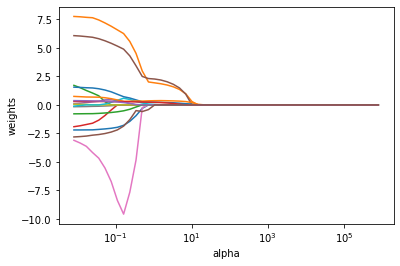

In [157]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Text(0, 0.5, 'weights')

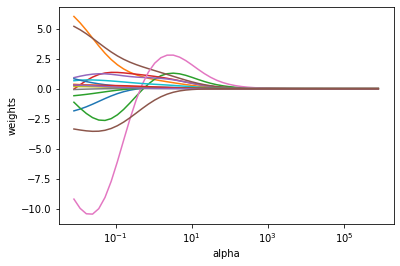

In [168]:

alphas = 10**np.linspace(6,-2,50)*0.8
alphas

ridge = Ridge(max_iter=10000, normalize=True)
coefs2 = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs2.append(ridge.coef_)
    
np.shape(coefs2)

ax = plt.gca()
ax.plot(alphas, coefs2)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [158]:
coefs

[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.]),
 array([ 0.,  0.,  0

In [159]:
c = []
for i in coefs:
  c.append(len([x for x in i if x > 0]) )

c.index(3)

coefs = coefs[c.index(3)]

colnames = X.columns.values.tolist()

colnames = [colnames[i] for i in range(len(colnames)) if coefs[i]>0 ]

colnames

['Hits', 'CRuns', 'CRBI']

In [166]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)

print("Alpha=", lassocv.alpha_)
lasso.fit(X_train, y_train)
print("mse = ",mean_squared_error(y_test, lasso.predict(X_test)))
print("best model coefficients:")
pd.Series(lasso.coef_, index=X.columns)

Alpha= 2.2410206769492604
mse =  111160.39367053009
best model coefficients:


AtBat      0.000000
Hits       0.951516
HmRun      0.000000
Runs       0.000000
RBI        0.402763
Walks      2.774631
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.268635
CRuns      0.000000
CRBI       0.492185
CWalks     0.000000
PutOuts    0.394770
Assists    0.000000
Errors    -0.000000
dtype: float64

In [167]:
ridgecv = RidgeCV(alphas=alphas, normalize=True)
ridgecv.fit(X_train, y_train)
print("Alpha=", ridgecv.alpha_)
ridge6 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge6.fit(X_train, y_train)
print("mse = ",mean_squared_error(y_test, ridge6.predict(X_test)))
print("best model coefficients:")
pd.Series(ridge6.coef_, index=X.columns)

Alpha= 0.5000441540219182
mse =  104938.85473715045
best model coefficients:


AtBat     -0.061531
Hits       0.873620
HmRun     -0.500499
Runs       0.676463
RBI        1.530035
Walks      2.080009
Years      0.280964
CAtBat     0.005930
CHits      0.053010
CHmRun     0.528357
CRuns      0.110028
CRBI       0.131784
CWalks     0.099807
PutOuts    0.312067
Assists    0.014189
Errors     0.149550
dtype: float64

1.1 The remained coefficients are ['Hits', 'CRuns', 'CRBI']. The optimized alpha value of Lasso is 2.24 with 6 parameters left.

1.2 The optimized alpha value of Ridge is 0.5.


2
Total error of a model is the sum of Bias and Variance.Bias is how well our selection of model fits the sample and Variance is how much the performance of each trained models varies. 
So if our model is overfitting. The bias of this model will be very low. However it is not comprehensive. Then the variance will be high. Vice versa. 

Thus when the Lasso uses all the parameters, the mse of training set will be very low however the performance on test set will not be as satisfying.